<a href="https://colab.research.google.com/github/sena1bayram/LOTUS_AI_ML_Siniflandirma/blob/main/ML_S%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Model: RandomForest
Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Confusion Matrix:
[[136  14]
 [ 24 247]]
Accuracy: 0.9097


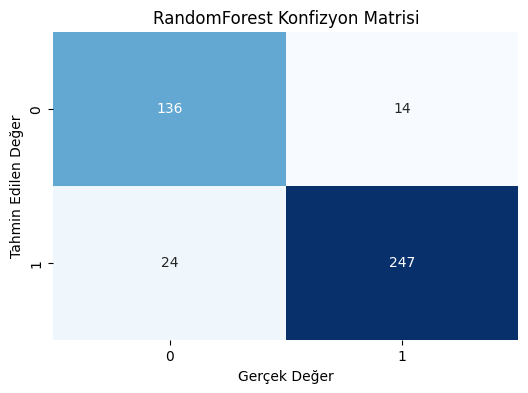


Model: SVM
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Confusion Matrix:
[[ 98  52]
 [ 39 232]]
Accuracy: 0.7838


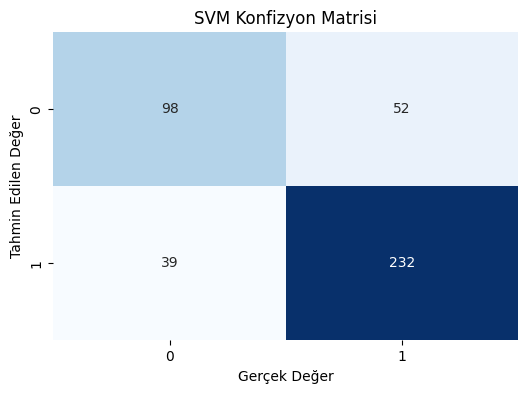


Model: KNN
Best Parameters: {'n_neighbors': 5}
Confusion Matrix:
[[ 91  59]
 [ 57 214]]
Accuracy: 0.7245


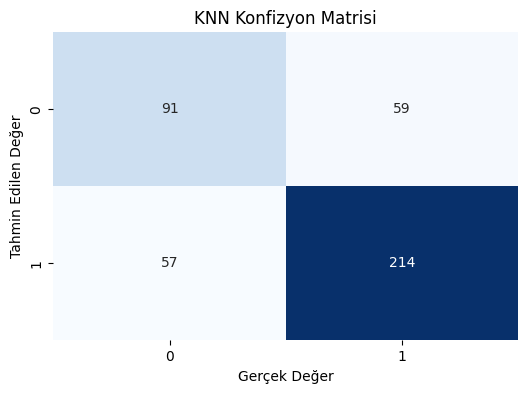


Model: LogisticRegression
Best Parameters: {'C': 10}
Confusion Matrix:
[[ 98  52]
 [ 42 229]]
Accuracy: 0.7767


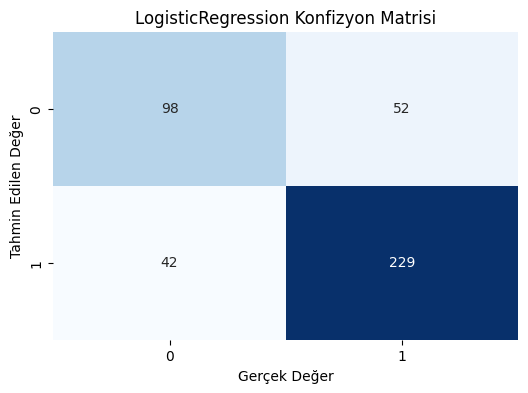


Model: DecisionTree
Best Parameters: {'max_depth': 5}
Confusion Matrix:
[[128  22]
 [ 46 225]]
Accuracy: 0.8385


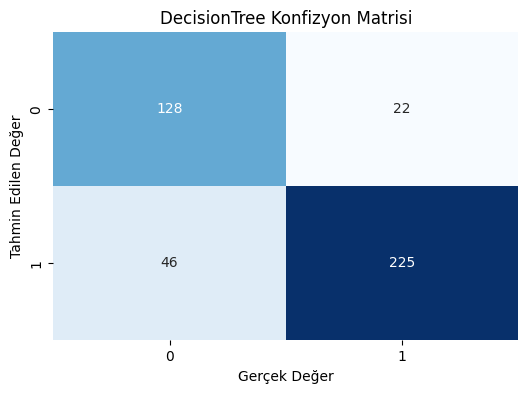


Model: NaiveBayes
Best Parameters: {}
Confusion Matrix:
[[107  43]
 [ 50 221]]
Accuracy: 0.7791


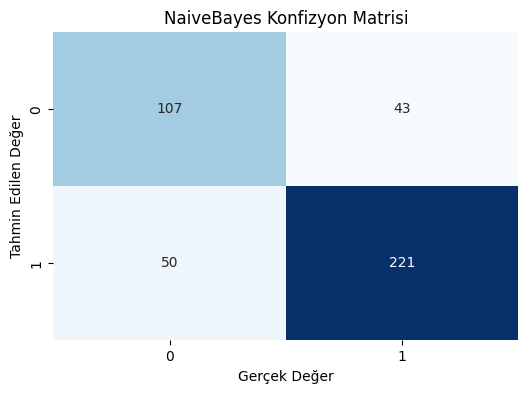


Model: XGBoost
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Confusion Matrix:
[[138  12]
 [ 21 250]]
Accuracy: 0.9216


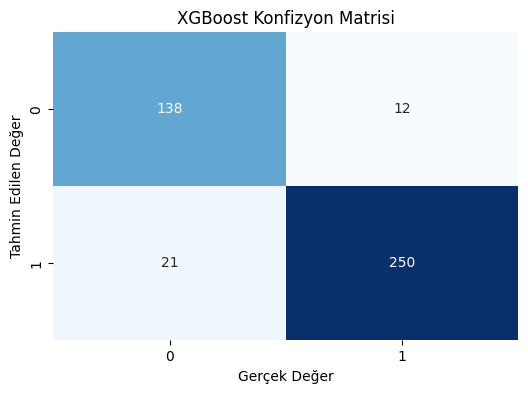


Model: LightGBM
[LightGBM] [Info] Number of positive: 1033, number of negative: 651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3308
[LightGBM] [Info] Number of data points in the train set: 1684, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.613420 -> initscore=0.461713
[LightGBM] [Info] Start training from score 0.461713
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Confusion Matrix:
[[137  13]
 [ 25 246]]
Accuracy: 0.9097


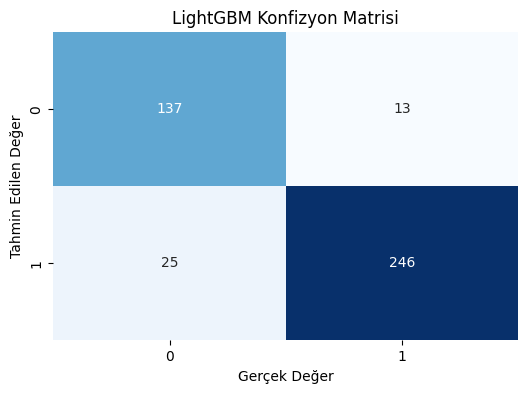


En iyi model: XGBoost - Doğruluk: 0.9216


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("parkinsons_disease_data.csv")
target_column = "Diagnosis"
X = data.drop(columns=[target_column, "PatientID", "DoctorInCharge"])
y = data[target_column]

categorical_columns = X.select_dtypes(include=["object"]).columns
X[categorical_columns] = X[categorical_columns].apply(LabelEncoder().fit_transform)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    "RandomForest": (RandomForestClassifier(), {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]}),
    "SVM": (SVC(probability=True), {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}),
    "KNN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7]}),
    "LogisticRegression": (LogisticRegression(max_iter=200), {"C": [0.1, 1, 10]}),
    "DecisionTree": (DecisionTreeClassifier(), {"max_depth": [5, 10, None]}),
    "NaiveBayes": (GaussianNB(), {}),
    "XGBoost": (XGBClassifier(eval_metric="mlogloss"), {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]}),
    "LightGBM": (LGBMClassifier(), {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]})
}

results = {}
for name, (model, params) in classifiers.items():
    print(f"\nModel: {name}")

    grid = GridSearchCV(model, params, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Best Parameters: {grid.best_params_}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy:.4f}")
    results[name] = accuracy

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'{name} Konfizyon Matrisi')
    plt.xlabel('Gerçek Değer')
    plt.ylabel('Tahmin Edilen Değer')
    plt.show()

best_model_name = max(results, key=results.get)
print(f"\nEn iyi model: {best_model_name} - Doğruluk: {results[best_model_name]:.4f}")

5-fold cross validation hali


Model: RandomForest
Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Cross-Validation Accuracy Scores: [0.94774347 0.93824228 0.94536817 0.93349169 0.8456057 ]
Mean CV Accuracy: 0.9221


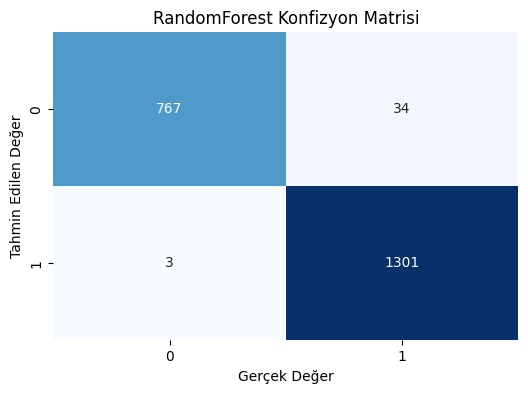


Model: SVM
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Cross-Validation Accuracy Scores: [0.82897862 0.83135392 0.83372922 0.85985748 0.7719715 ]
Mean CV Accuracy: 0.8252


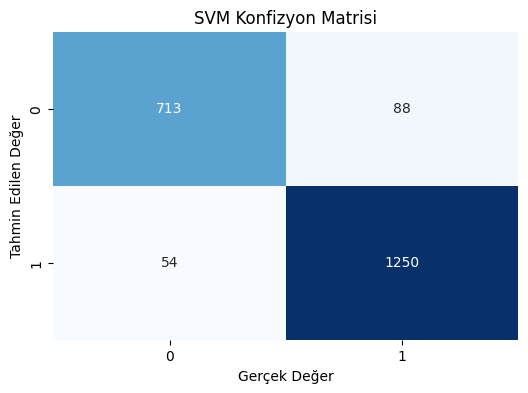


Model: KNN
Best Parameters: {'n_neighbors': 7}
Cross-Validation Accuracy Scores: [0.74346793 0.74109264 0.75534442 0.75771971 0.695962  ]
Mean CV Accuracy: 0.7387


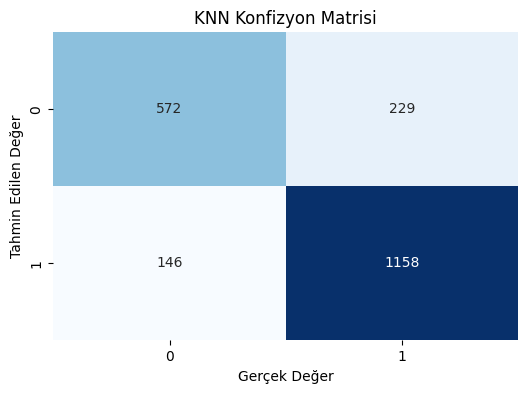


Model: LogisticRegression
Best Parameters: {'C': 1}
Cross-Validation Accuracy Scores: [0.83847981 0.81947743 0.82422803 0.83372922 0.74109264]
Mean CV Accuracy: 0.8114


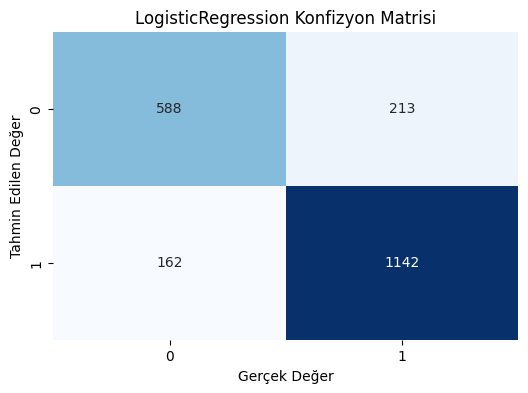


Model: DecisionTree
Best Parameters: {'max_depth': 5}
Cross-Validation Accuracy Scores: [0.91448931 0.87410926 0.90261283 0.89548694 0.81472684]
Mean CV Accuracy: 0.8803


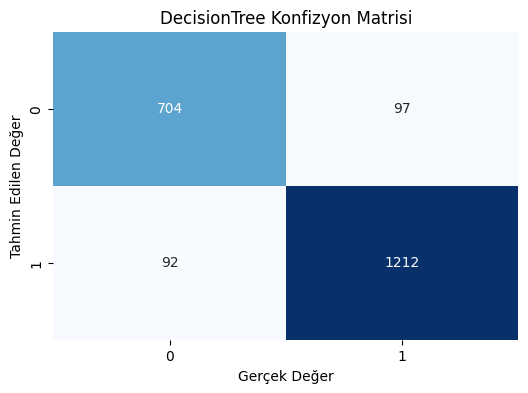


Model: NaiveBayes
Best Parameters: Varsayılan Parametreler
Cross-Validation Accuracy Scores: [0.80047506 0.77434679 0.7719715  0.81472684 0.76009501]
Mean CV Accuracy: 0.7843


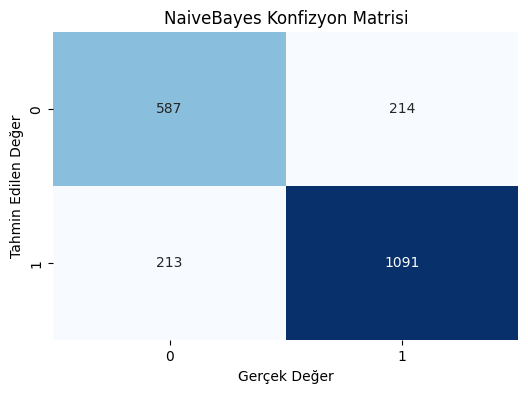


Model: XGBoost
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Cross-Validation Accuracy Scores: [0.95486936 0.93586698 0.94536817 0.93586698 0.8432304 ]
Mean CV Accuracy: 0.9230


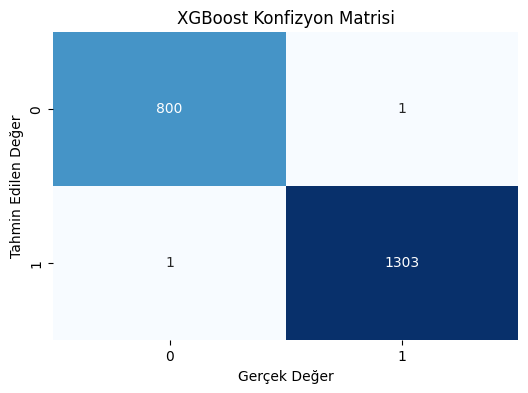


Model: LightGBM
[LightGBM] [Info] Number of positive: 1304, number of negative: 801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3308
[LightGBM] [Info] Number of data points in the train set: 2105, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.619477 -> initscore=0.487331
[LightGBM] [Info] Start training from score 0.487331
[LightGBM] [Info] Number of positive: 1044, number of negative: 640
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3308
[LightGBM] [Info] Number of data points in the train set: 1684, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.619952 -> initscore=0.489

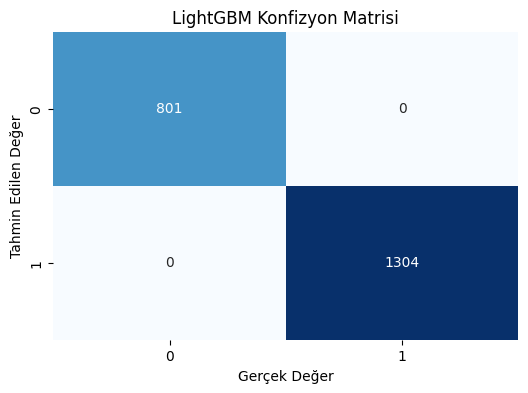


En iyi model: LightGBM - Ortalama CV Doğruluk: 0.9254


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("parkinsons_disease_data.csv")
target_column = "Diagnosis"
X = data.drop(columns=[target_column, "PatientID", "DoctorInCharge"])
y = data[target_column]

categorical_columns = X.select_dtypes(include=["object"]).columns
X[categorical_columns] = X[categorical_columns].apply(LabelEncoder().fit_transform)

scaler = StandardScaler()
X = scaler.fit_transform(X)

classifiers = {
    "RandomForest": (RandomForestClassifier(), {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]}),
    "SVM": (SVC(probability=True), {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}),
    "KNN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7]}),
    "LogisticRegression": (LogisticRegression(max_iter=500), {"C": [0.1, 1, 10]}),
    "DecisionTree": (DecisionTreeClassifier(), {"max_depth": [5, 10, None]}),
    "NaiveBayes": (GaussianNB(), {}),
    "XGBoost": (XGBClassifier(eval_metric="mlogloss"), {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]}),
    "LightGBM": (LGBMClassifier(), {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]})
}

results = {}
for name, (model, params) in classifiers.items():
    print(f"\nModel: {name}")

    grid = GridSearchCV(model, params, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X, y)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X)

    cm = confusion_matrix(y, y_pred)
    cv_scores = cross_val_score(best_model, X, y, cv=5, scoring="accuracy")

    print(f"Best Parameters: {grid.best_params_ if params else 'Varsayılan Parametreler'}")
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

    results[name] = np.mean(cv_scores)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'{name} Konfizyon Matrisi')
    plt.xlabel('Gerçek Değer')
    plt.ylabel('Tahmin Edilen Değer')
    plt.show()

best_model_name = max(results, key=results.get)
print(f"\nEn iyi model: {best_model_name} - Ortalama CV Doğruluk: {results[best_model_name]:.4f}")

10- fold cv


Model: RandomForest
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Cross-Validation Accuracy Scores: [0.92890995 0.95734597 0.93364929 0.93364929 0.98104265 0.92857143
 0.93333333 0.92857143 0.92857143 0.74761905]
Mean CV Accuracy: 0.9201


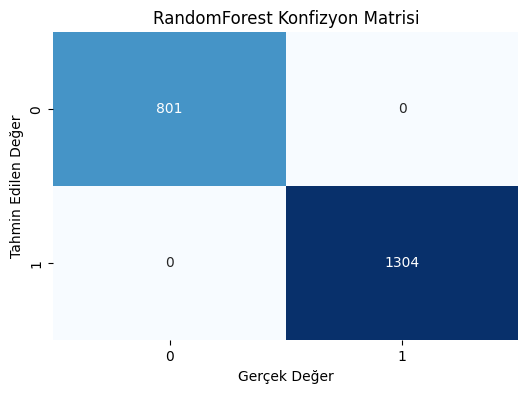


Model: SVM
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Cross-Validation Accuracy Scores: [0.83412322 0.84834123 0.81990521 0.8436019  0.86729858 0.85714286
 0.86190476 0.82857143 0.81428571 0.72857143]
Mean CV Accuracy: 0.8304


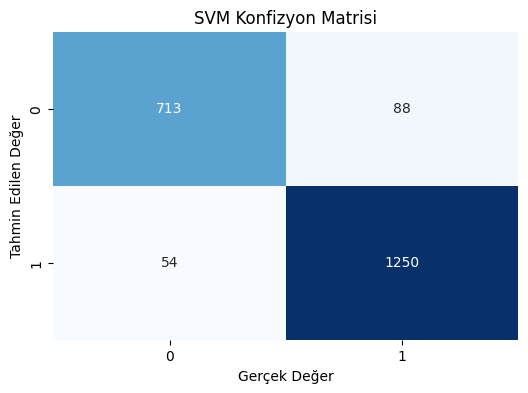


Model: KNN
Best Parameters: {'n_neighbors': 7}
Cross-Validation Accuracy Scores: [0.74881517 0.7535545  0.7535545  0.7535545  0.76303318 0.71428571
 0.75238095 0.74285714 0.71904762 0.68571429]
Mean CV Accuracy: 0.7387


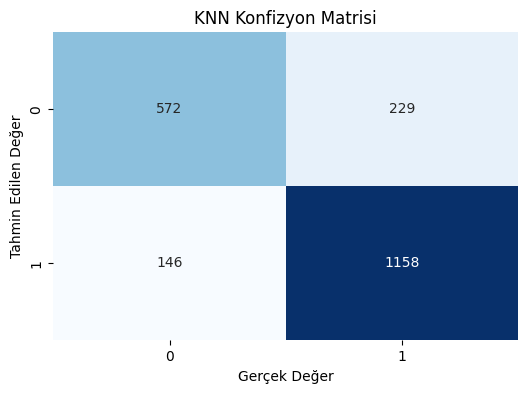


Model: LogisticRegression
Best Parameters: {'C': 0.1}
Cross-Validation Accuracy Scores: [0.83886256 0.83886256 0.81516588 0.85308057 0.82938389 0.80952381
 0.85714286 0.81904762 0.78571429 0.68095238]
Mean CV Accuracy: 0.8128


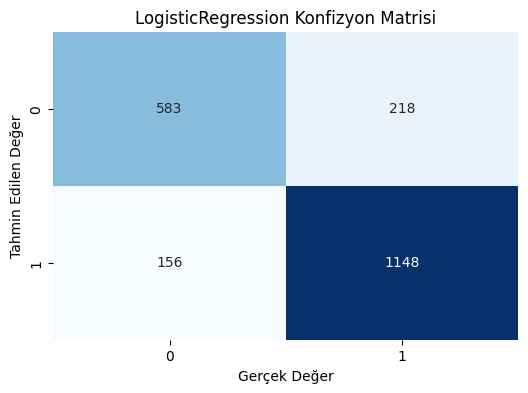


Model: DecisionTree
Best Parameters: {'max_depth': None}
Cross-Validation Accuracy Scores: [0.83886256 0.8957346  0.8957346  0.88151659 0.88151659 0.88095238
 0.92380952 0.85714286 0.90952381 0.73333333]
Mean CV Accuracy: 0.8698


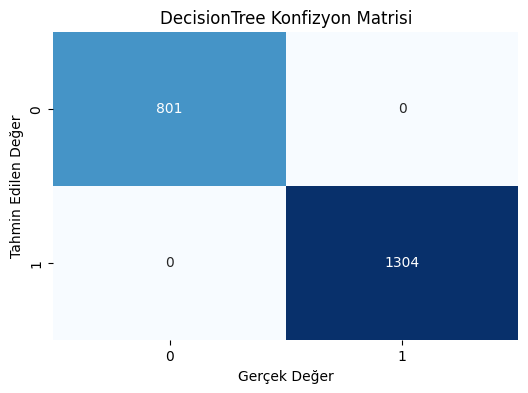


Model: NaiveBayes
Best Parameters: Varsayılan Parametreler
Cross-Validation Accuracy Scores: [0.81516588 0.79146919 0.78672986 0.77251185 0.81990521 0.75238095
 0.8047619  0.81428571 0.8047619  0.72380952]
Mean CV Accuracy: 0.7886


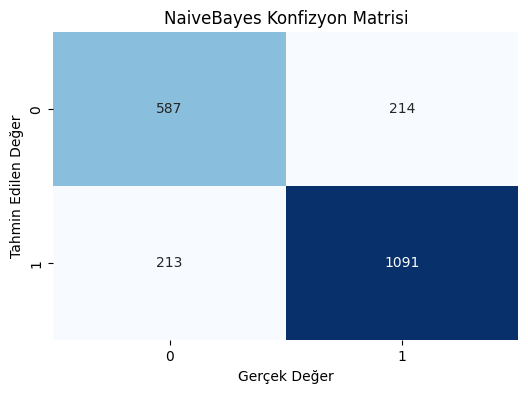


Model: XGBoost
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Cross-Validation Accuracy Scores: [0.93838863 0.96682464 0.92890995 0.92890995 0.96682464 0.94285714
 0.94761905 0.93333333 0.95714286 0.75714286]
Mean CV Accuracy: 0.9268


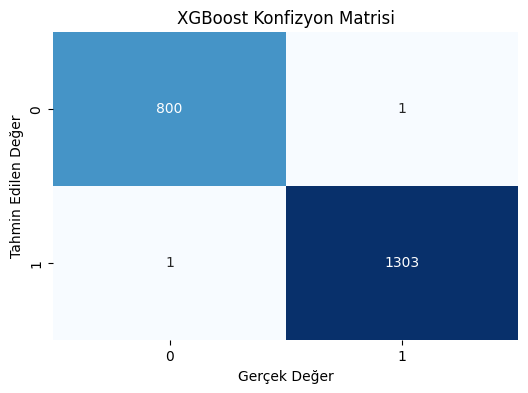


Model: LightGBM
[LightGBM] [Info] Number of positive: 1304, number of negative: 801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3308
[LightGBM] [Info] Number of data points in the train set: 2105, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.619477 -> initscore=0.487331
[LightGBM] [Info] Start training from score 0.487331
[LightGBM] [Info] Number of positive: 1174, number of negative: 720
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3308
[LightGBM] [Info] Number of data points in the train set: 1894, number of used features: 32
[LightGBM] 

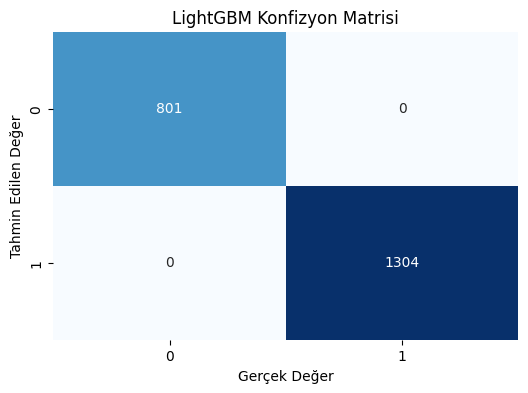


En iyi model: LightGBM - Ortalama CV Doğruluk: 0.9273


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("parkinsons_disease_data.csv")
target_column = "Diagnosis"
X = data.drop(columns=[target_column, "PatientID", "DoctorInCharge"])
y = data[target_column]

categorical_columns = X.select_dtypes(include=["object"]).columns
X[categorical_columns] = X[categorical_columns].apply(LabelEncoder().fit_transform)

scaler = StandardScaler()
X = scaler.fit_transform(X)

classifiers = {
    "RandomForest": (RandomForestClassifier(), {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]}),
    "SVM": (SVC(probability=True), {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}),
    "KNN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7]}),
    "LogisticRegression": (LogisticRegression(max_iter=500), {"C": [0.1, 1, 10]}),
    "DecisionTree": (DecisionTreeClassifier(), {"max_depth": [5, 10, None]}),
    "NaiveBayes": (GaussianNB(), {}),
    "XGBoost": (XGBClassifier(eval_metric="mlogloss"), {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]}),
    "LightGBM": (LGBMClassifier(), {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]})
}


results = {}
for name, (model, params) in classifiers.items():
    print(f"\nModel: {name}")

    grid = GridSearchCV(model, params, cv=10, scoring="accuracy", n_jobs=-1)
    grid.fit(X, y)

    best_model = grid.best_estimator_
    cv_scores = cross_val_score(best_model, X, y, cv=10, scoring="accuracy")

    print(f"Best Parameters: {grid.best_params_ if params else 'Varsayılan Parametreler'}")
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

    results[name] = np.mean(cv_scores)

    y_pred = best_model.predict(X)
    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'{name} Konfizyon Matrisi')
    plt.xlabel('Gerçek Değer')
    plt.ylabel('Tahmin Edilen Değer')
    plt.show()


best_model_name = max(results, key=results.get)
print(f"\nEn iyi model: {best_model_name} - Ortalama CV Doğruluk: {results[best_model_name]:.4f}")

özellik çıkarımı ile


Model: RandomForest
Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Cross-Validation Accuracy Scores: [0.91943128 0.93364929 0.90995261 0.92417062 0.93838863 0.90952381
 0.92380952 0.90952381 0.9        0.72857143]
Mean CV Accuracy: 0.8997


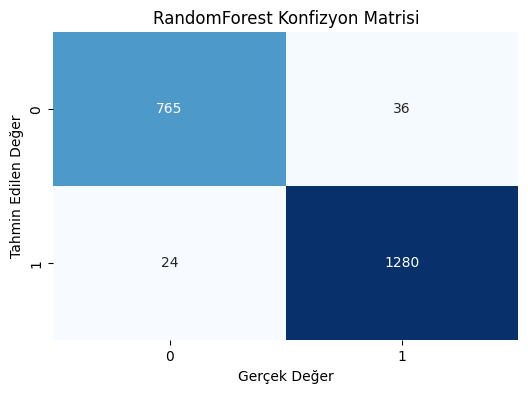


Model: SVM
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Cross-Validation Accuracy Scores: [0.87203791 0.88151659 0.90047393 0.85781991 0.88151659 0.90952381
 0.87142857 0.86666667 0.86666667 0.73333333]
Mean CV Accuracy: 0.8641


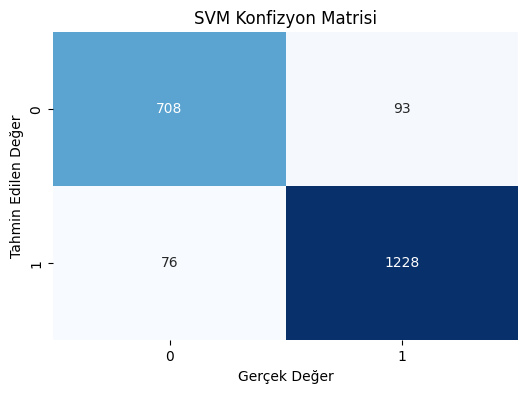


Model: KNN
Best Parameters: {'n_neighbors': 7}
Cross-Validation Accuracy Scores: [0.82464455 0.84834123 0.85308057 0.81042654 0.8436019  0.86190476
 0.84761905 0.84761905 0.84285714 0.74761905]
Mean CV Accuracy: 0.8328


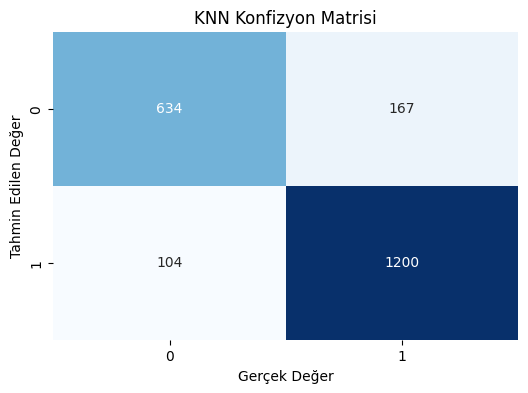


Model: LogisticRegression
Best Parameters: {'C': 1}
Cross-Validation Accuracy Scores: [0.81042654 0.81042654 0.79620853 0.82464455 0.79146919 0.81428571
 0.85714286 0.78571429 0.78095238 0.68095238]
Mean CV Accuracy: 0.7952


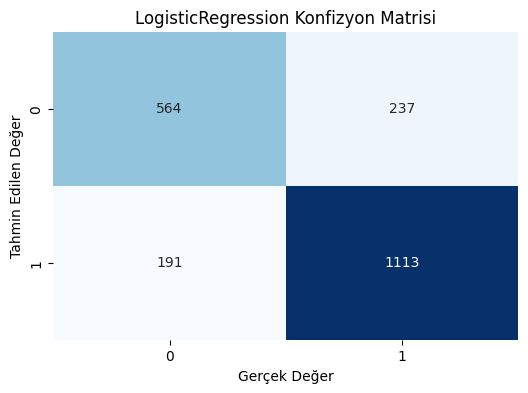


Model: DecisionTree
Best Parameters: {'max_depth': 5}
Cross-Validation Accuracy Scores: [0.91943128 0.92890995 0.89099526 0.88151659 0.92890995 0.92380952
 0.91904762 0.89047619 0.88095238 0.74285714]
Mean CV Accuracy: 0.8907


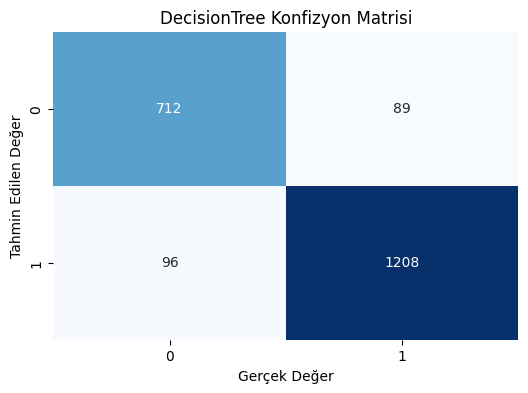


Model: NaiveBayes
Best Parameters: Varsayılan Parametreler
Cross-Validation Accuracy Scores: [0.83412322 0.8056872  0.81516588 0.79146919 0.77725118 0.76666667
 0.81428571 0.77142857 0.78571429 0.69047619]
Mean CV Accuracy: 0.7852


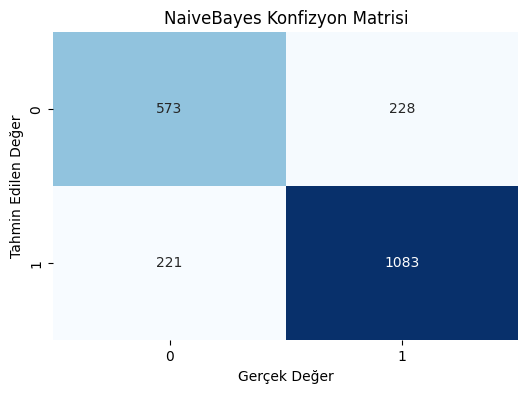


Model: XGBoost
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Cross-Validation Accuracy Scores: [0.92890995 0.93838863 0.90521327 0.91469194 0.9478673  0.92857143
 0.92380952 0.90952381 0.91904762 0.73809524]
Mean CV Accuracy: 0.9054


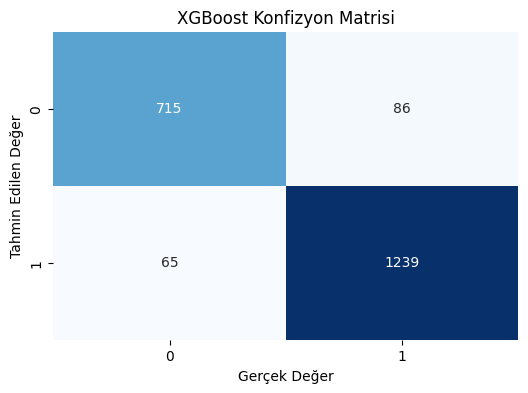


Model: LightGBM
[LightGBM] [Info] Number of positive: 1304, number of negative: 801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1794
[LightGBM] [Info] Number of data points in the train set: 2105, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.619477 -> initscore=0.487331
[LightGBM] [Info] Start training from score 0.487331
[LightGBM] [Info] Number of positive: 1174, number of negative: 720
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1794
[LightGBM] [Info] Number of data points in the train set: 1894, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.619852 -> initscore=0.488

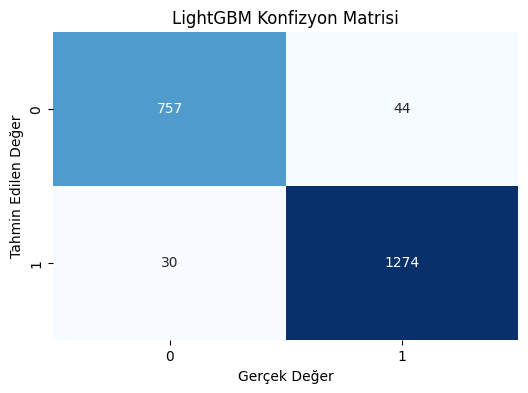


En iyi model: XGBoost - Ortalama CV Doğruluk: 0.9054


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veri setini okuma ve işleme
data = pd.read_csv("parkinsons_disease_data.csv")
target_column = "Diagnosis"  # Sınıflandırma hedef sütunu
X = data.drop(columns=[target_column, "PatientID", "DoctorInCharge"])  # Bağımsız değişkenler
y = data[target_column]

# Kategorik sütunları sayısal verilere dönüştür
categorical_columns = X.select_dtypes(include=["object"]).columns
X[categorical_columns] = X[categorical_columns].apply(LabelEncoder().fit_transform)

# Veriyi ölçeklendir
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 2. Özellik çıkarımı
# Temel istatistikler
X_stats = pd.DataFrame({
    'mean': np.mean(X, axis=1),
    'std': np.std(X, axis=1),
    'max': np.max(X, axis=1),
    'min': np.min(X, axis=1)
})
X = np.hstack((X, X_stats.values))

# PCA
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)
X = np.hstack((X, X_pca))


X = SelectKBest(f_classif, k=10).fit_transform(X, y)


classifiers = {
    "RandomForest": (RandomForestClassifier(), {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]}),
    "SVM": (SVC(probability=True), {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}),
    "KNN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7]}),
    "LogisticRegression": (LogisticRegression(max_iter=500), {"C": [0.1, 1, 10]}),
    "DecisionTree": (DecisionTreeClassifier(), {"max_depth": [5, 10, None]}),
    "NaiveBayes": (GaussianNB(), {}),
    "XGBoost": (XGBClassifier(eval_metric="mlogloss"), {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]}),
    "LightGBM": (LGBMClassifier(), {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]})
}

results = {}
for name, (model, params) in classifiers.items():
    print(f"\nModel: {name}")


    grid = GridSearchCV(model, params, cv=10, scoring="accuracy", n_jobs=-1)
    grid.fit(X, y)


    best_model = grid.best_estimator_
    cv_scores = cross_val_score(best_model, X, y, cv=10, scoring="accuracy")

    print(f"Best Parameters: {grid.best_params_ if params else 'Varsayılan Parametreler'}")
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

    results[name] = np.mean(cv_scores)


    y_pred = best_model.predict(X)
    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'{name} Konfizyon Matrisi')
    plt.xlabel('Gerçek Değer')
    plt.ylabel('Tahmin Edilen Değer')
    plt.show()

best_model_name = max(results, key=results.get)
print(f"\nEn iyi model: {best_model_name} - Ortalama CV Doğruluk: {results[best_model_name]:.4f}")